Github Repository: https://github.com/catebros/ML-fundamentals-2025/tree/main

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy
import kagglehub

path = 'hour.csv'

things for optimization: train/test/valid split

research: paper,previous work, his notebooks

class imbalance, feature selection

class:
- Lecture 3: Data: errors, dealing with missing values
- Lecture 4: Data imbalance, encoders
- Lecture 5: Feature engineering, encoding, selection, scaling
- Lecture 6: Supervised Learning ALgorithms
- Lecture 7: Pipeline + Performance Metrics
- Lecture 8: Performance Metrics
- Lecture 9 -10: Hyperparameter tuning, bias, regularization
- Lecture 11: Graph
- Lecture 12: Data leakage

# Task 1: Exploratory Data Analysis (EDA)
Lecture material: Lecture 6 (slides 4–16), Lecture 7(slides 3–9), Lecture 8(slides 2–5)
- Load the hour.csv dataset. (Done)
- Examine the target variable (cnt) distribution and identify its skewness. (Done)
- Explore analytically the influence of temporal (hr, weekday, mnth, season), binary (holiday, workingday), and weather-related features(temp, atemp, hum, windspeed, weathersit) on cnt
- Visualize relationships using, forexample, scatterplots, boxplots, and line plots grouped by hour,day,and season, or any other analysis/plot you deem necessary
- Identify any suspicious patterns, outliers, or anomalies.
- Consider dropping the columns instant, dteday, casual, and registered

In [63]:
df = pd.read_csv(path)

In [64]:
df.shape

(17379, 17)

In [65]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [66]:
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [67]:
df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

 **Variables of the dataset**
- Temporal:
    - dteday
    - season
    - yr
    - mnth
    - hr
    - weekday
- Binary:
    - holiday
    - workingday
- Weather:
    - Categorical:
        - weathersit
    - Numerical:
        - temp
        - atemp
        - windspeed
- Other:
    - instant
    - casual
    - registered



## Basic Count plots

In [68]:
df['cnt'].max()

np.int64(977)

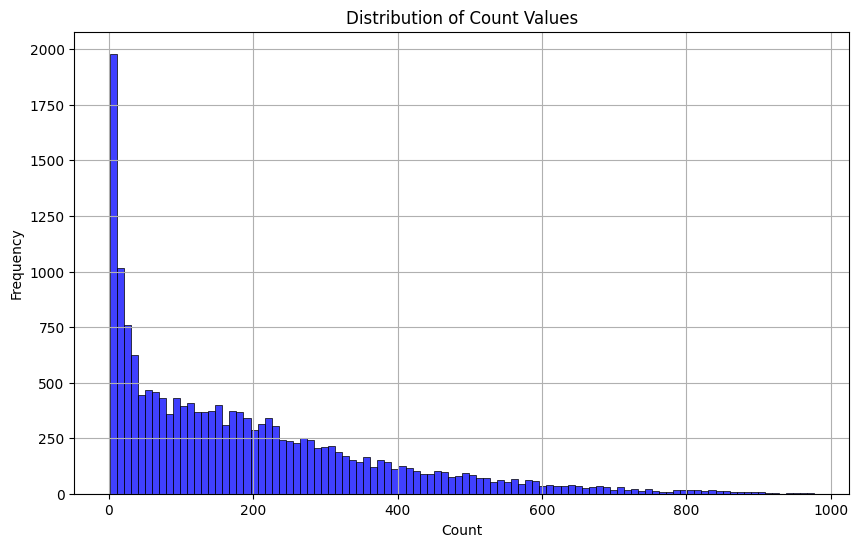

In [69]:
plt.figure(figsize=(10, 6))
sns.histplot(df['cnt'], bins=100, color='blue')
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.title('Distribution of Count Values')
plt.grid(True)
plt.show()

### Skewness

Visually we can say that the data is right skewed, however is better to find a real quantitative measure to asses this, that why we can use the .skew() function, if the value is higher than zero it haves a right tail (Right skewness), if we also compare the mean and median we can see there is a significant difference of 45 units??, or a 4% difference if we take into account the range of values, confirming a moderate right skewness. 

In [70]:
from scipy.stats import skew

skewness = skew(df["cnt"])
print("Skewness:", skewness)

mean_value = df["cnt"].mean()
median_value = df["cnt"].median()

print("Mean:", mean_value)
print("Median:", median_value)
print("Proportion of difference", abs(mean_value - median_value)/df['cnt'].max() *100, "%")

Skewness: 1.2773013463494975
Mean: 189.46308763450142
Median: 142.0
Proportion of difference 4.858043770163912 %


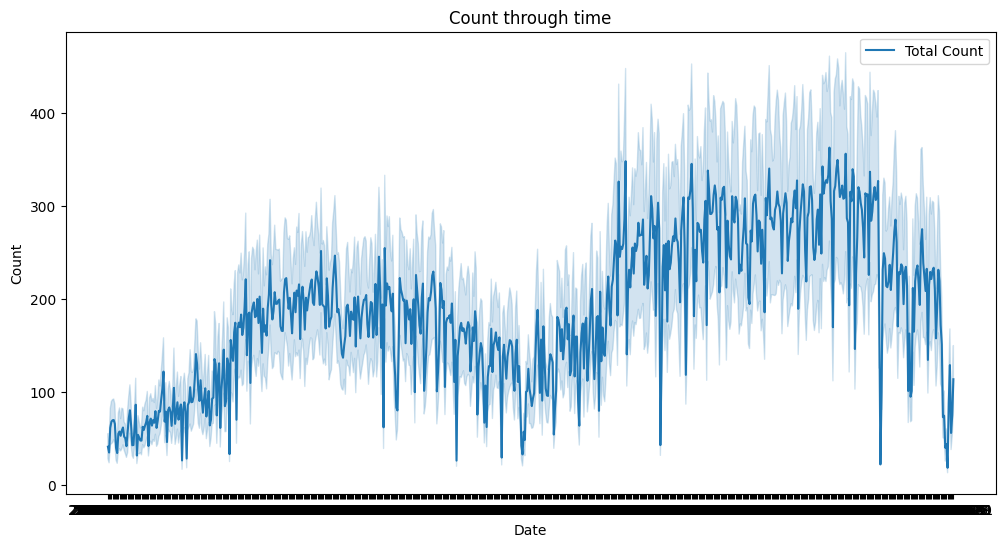

In [71]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=df['dteday'], y=df['cnt'], label='Total Count')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Count through time')
plt.legend()
plt.show()

## Dropping some variables

In [72]:
df.drop(columns=['instant', 'casual', 'registered'], inplace=True)

In [73]:
df.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


missing values...

# Task 2: Data Splitting
Lecture Material: Lecture 8 (slide 4), Lecture 12 (slides 4–5)

- Split the dataset into: Training set (60%), Validation set (20%), Test set (20%). If necessary, reevaluate these percentages when tuning the model.
- Use a random split while preserving temporal order if possible.
- Apply the split before performing any feature engineering or scaling to avoid leakage.

In [74]:
from sklearn.model_selection import train_test_split

df = df.sort_values("dteday").reset_index(drop=True)
df.drop(columns=['dteday'], inplace=True)

train_df, temp_df = train_test_split(df, train_size=0.6, shuffle=False)
valid_df, test_df = train_test_split(temp_df, test_size=0.5, shuffle=False)

print(f"Training Set: {len(train_df)} rows")
print(f"Validation Set: {len(valid_df)} rows")
print(f"Test Set: {len(test_df)} rows")

Training Set: 10427 rows
Validation Set: 3476 rows
Test Set: 3476 rows


checkk the temporal part

# Task 3: Feature Engineering
Lecture Material: Lecture 9 (slides 2–8), Lecture 12 (slides 4–9)
- Encode cyclical features (hr, weekday) using sine and cosine transforms.
- One-hot encode categorical variables: season, weathersit, and mnth.
- Apply scaling (e.g., StandardScaler) to continuous features: temp, atemp, hum, and windspeed.
- Fit all transformations using only the training set, and apply them to validation and test sets.
- Consider interaction terms such as temp × humidity if they are justified by EDA.
- Remove leaky or redundant features (e.g., atemp if highly collinear with temp).

## 3.1 Encode cyclical features

In [75]:
def encode_cyclical(df):
    df["hr_sin"] = np.sin(2 * np.pi * df["hr"] / 24)
    df["hr_cos"] = np.cos(2 * np.pi * df["hr"] / 24)

    df["weekday_sin"] = np.sin(2 * np.pi * df["weekday"] / 7)
    df["weekday_cos"] = np.cos(2 * np.pi * df["weekday"] / 7)

    return df.drop(columns=["hr", "weekday"])

train_data = encode_cyclical(train_df)
valid_data = encode_cyclical(valid_df)
test_data = encode_cyclical(test_df)

print(train_df.head())
print(valid_df.head())
print(test_df.head())

   season  yr  mnth  hr  holiday  weekday  workingday  weathersit  temp  \
0       1   0     1   0        0        6           0           1  0.24   
1       1   0     1  23        0        6           0           2  0.46   
2       1   0     1  22        0        6           0           2  0.40   
3       1   0     1  21        0        6           0           2  0.40   
4       1   0     1  20        0        6           0           2  0.40   

    atemp   hum  windspeed  cnt    hr_sin    hr_cos  weekday_sin  weekday_cos  
0  0.2879  0.81     0.0000   16  0.000000  1.000000    -0.781831      0.62349  
1  0.4545  0.88     0.2985   39 -0.258819  0.965926    -0.781831      0.62349  
2  0.4091  0.94     0.2239   28 -0.500000  0.866025    -0.781831      0.62349  
3  0.4091  0.87     0.1940   34 -0.707107  0.707107    -0.781831      0.62349  
4  0.4091  0.87     0.2537   36 -0.866025  0.500000    -0.781831      0.62349  
       season  yr  mnth  hr  holiday  weekday  workingday  weathersit

## 3.2 One hot encoding

In [76]:
from sklearn.preprocessing import OneHotEncoder

categorical_features = ["season", "weathersit", "mnth"]

encoder = OneHotEncoder(drop="first", sparse_output=False)

# encoding
train_encoded = encoder.fit_transform(train_df[categorical_features])
valid_encoded = encoder.transform(valid_df[categorical_features])
test_encoded = encoder.transform(test_df[categorical_features])

# remaking the df
encoded_columns = encoder.get_feature_names_out(categorical_features)
train_encoded_df = pd.DataFrame(train_encoded, columns=encoded_columns, index=train_df.index)
valid_encoded_df = pd.DataFrame(valid_encoded, columns=encoded_columns, index=valid_df.index)
test_encoded_df = pd.DataFrame(test_encoded, columns=encoded_columns, index=test_df.index)

# concatenate
train_data = pd.concat([train_df.drop(columns=categorical_features), train_encoded_df], axis=1)
valid_data = pd.concat([valid_df.drop(columns=categorical_features), valid_encoded_df], axis=1)
test_data = pd.concat([test_df.drop(columns=categorical_features), test_encoded_df], axis=1)

print(train_df.head())
print(valid_df.head())
print(test_df.head())


   season  yr  mnth  hr  holiday  weekday  workingday  weathersit  temp  \
0       1   0     1   0        0        6           0           1  0.24   
1       1   0     1  23        0        6           0           2  0.46   
2       1   0     1  22        0        6           0           2  0.40   
3       1   0     1  21        0        6           0           2  0.40   
4       1   0     1  20        0        6           0           2  0.40   

    atemp   hum  windspeed  cnt    hr_sin    hr_cos  weekday_sin  weekday_cos  
0  0.2879  0.81     0.0000   16  0.000000  1.000000    -0.781831      0.62349  
1  0.4545  0.88     0.2985   39 -0.258819  0.965926    -0.781831      0.62349  
2  0.4091  0.94     0.2239   28 -0.500000  0.866025    -0.781831      0.62349  
3  0.4091  0.87     0.1940   34 -0.707107  0.707107    -0.781831      0.62349  
4  0.4091  0.87     0.2537   36 -0.866025  0.500000    -0.781831      0.62349  
       season  yr  mnth  hr  holiday  weekday  workingday  weathersit

In [77]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# ====== 3. Scale Continuous Features ======
continuous_features = ["temp", "atemp", "hum", "windspeed"]

scaler = StandardScaler()
scaler.fit(train_data[continuous_features])  # Fit only on training data

# Transform
train_data[continuous_features] = scaler.transform(train_data[continuous_features])
valid_data[continuous_features] = scaler.transform(valid_data[continuous_features])
test_data[continuous_features] = scaler.transform(test_data[continuous_features])

# ====== Final Data Check ======
print(f"Training Set: {train_data.shape}")
print(f"Validation Set: {valid_data.shape}")
print(f"Test Set: {test_data.shape}")



Training Set: (10427, 31)
Validation Set: (3476, 31)
Test Set: (3476, 31)


## 3.3 Scaling

In [78]:
continuous_features = ["temp", "atemp", "hum", "windspeed"]

# scale
scaler = sklearn.preprocessing.StandardScaler()
scaler.fit(train_data[continuous_features])

train_data[continuous_features] = scaler.transform(train_df[continuous_features])
valid_data[continuous_features] = scaler.transform(valid_df[continuous_features])
test_data[continuous_features] = scaler.transform(test_df[continuous_features])

# verify
print('Train set after scaling:')
print(train_df[continuous_features].head())

print('\nValidation set after scaling:')
print(valid_df[continuous_features].head())

print('\nTest set after scaling:')
print(test_df[continuous_features].head())

Train set after scaling:
   temp   atemp   hum  windspeed
0  0.24  0.2879  0.81     0.0000
1  0.46  0.4545  0.88     0.2985
2  0.40  0.4091  0.94     0.2239
3  0.40  0.4091  0.87     0.1940
4  0.40  0.4091  0.87     0.2537

Validation set after scaling:
       temp   atemp   hum  windspeed
10427  0.50  0.4848  0.59     0.1045
10428  0.50  0.4848  0.59     0.0000
10429  0.50  0.4848  0.63     0.0000
10430  0.44  0.4394  0.77     0.1045
10431  0.56  0.5303  0.60     0.1343

Test set after scaling:
       temp   atemp   hum  windspeed
13903  0.74  0.6970  0.70     0.1343
13904  0.70  0.6667  0.84     0.1940
13905  0.70  0.6667  0.84     0.1343
13906  0.70  0.6667  0.84     0.1343
13907  0.70  0.6667  0.84     0.0000


## 3.4 Interaction terms 
such as temp × humidity if they are justified by EDA

## 3.5 Remove leaky or redundant features 
(e.g., atemp if highly collinear with temp).

## Material

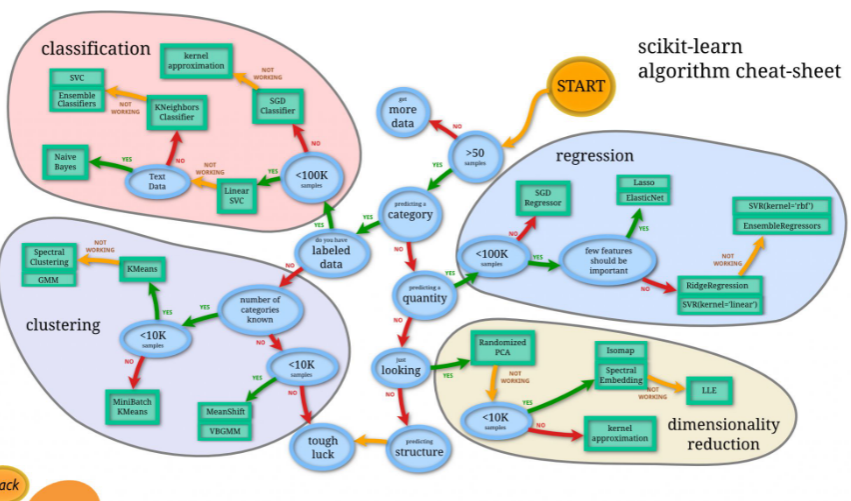

Preconditions for Supervised Learning
1. We have a labeled dataset.
2. We split the dataset into training, validation, and test sets.
3. Records in the validation and test sets are statistically similar.
4. We engineered features and filled missing values using only the training data.
5. We converted all examples into numerical feature vectors.
6. We selected a performance metric that returns a single number.
7. We have a baseline.

Selecting the Learning Algorithm
9
● Time limits the amount of try-and-error we can do with alternative algorithms.
● Process of selection:
○ Explainability: Do we need to understand/explain how/why an algorithm made a prediction?
Opaque: DNN, ensemble models; Transparent: kNN, linear regression, decision tree learning.
○ In-memory vs. out-of-memory: Can we load all the dataset in the RAM? If not, incremental
learning algorithms, i.e., Naïve Bayes and neural network (NN) training algorithms.
○ Number of records and features: What is the maximum dataset/feature size/number
managed by the algorithm? E.g., SVM modest size/number; NN and random forests millions.
○ Nonlinearity of the data: Are data linearly separable? Yes: SVM + linear kernel, linear and
logistic regression; No: DNN or ensembles.
○ Training speed: How much time do we have for (re)training the algorithm? Consider retraining
time (e.g., every hour), opportunities for parallelism (e.g., random tree forests), GPUs (e.g.,
NN)
○ Prediction speed: How fast does a prediction/inference need to be? Consider throughput
requirements. Shallow is faster than deeper algorithms (e.g., DNN, KNN, ensemble)

# Task 4: Baseline Model – Linear Regression
Lecture Material: Lecture 9 (slides 4–7), Lecture 11 (slides 2–4)

- Train a Linear Regression model.
- Evaluate on the validation set using, at least:
    - Mean Squared Error (MSE)
    - Mean Absolute Error (MAE)
    - R² Score
- Plot at least the residuals and analyze their distribution.
- Reflect on bias and variance characteristics of this model.

Note: Make the training and evaluation of the models as uniform as possible to enable proper comparison. Use the same features to train all the models (before refinement and tuning) and use at least MSE, MAE, and R² Score.

In [79]:
X_train = train_df.drop('cnt', axis=1) 
y_train = train_df['cnt']  
X_test = test_df.drop('cnt', axis=1) 
y_test = test_df['cnt']  
X_valid = test_df.drop('cnt', axis=1) 
y_valid = test_df['cnt']  

In [80]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [83]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = model.predict(X_valid)

print(f'Predictions on the validation set: {y_pred}')

Predictions on the validation set: [284.26463849 167.54028473 159.89756225 ... 150.07500241 153.9777415
 130.03578618]


In [84]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_valid, y_pred)
mae = mean_absolute_error(y_valid, y_pred)
r2 = r2_score(y_valid, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R² Score: {r2}')

Mean Squared Error (MSE): 29334.4998219475
Mean Absolute Error (MAE): 122.44929882705057
R² Score: 0.3953605888883329


## Material

● What it does:
- Fits a linear relationship between input features and the target variable.
- Linear relationship: occurs when the change in the target variable (dependent variable) is proportional to the change in an input feature (independent variable).

● How it works:
- Minimizes the sum of squared residuals.

● Preconditions for its applicability:
- Assumes linearity, no multicollinearity, homoscedasticity.
- Multicollinearity: input features are highly correlated, difficult to estimate coefficients accurately.
- Homoscedasticity: the spread of residuals (difference between observed and predicted values) should remain constant regardless of the value of the independent variables.

● Performance Evaluation:
- R^2 score: proportion of dependent variable variance predictable from the independent variables
- Mean Squared Error (MSE): average of the squared differences between actual and predicted values.

● Pros/cons:
- Simple, interpretable but linear relationships and sensitive to outliers

# Task 5: Random Forest Regressor – Model Specification and Training
Lecture Material: Lecture 11 (slides 5–7), Lecture 12 (slides 4–5)
- Train a Random Forest Regressor.
- Use default or initial parameters (e.g., 100 trees, no depth limit) to establish a baseline.
- Evaluate using the same metrics as above.
- Compare with the baseline model and explain observed differences.
- Include at least a feature importance plot and comment on top predictors.



In [85]:
X_train = train_df.drop('cnt', axis=1) 
y_train = train_df['cnt']  
X_test = test_df.drop('cnt', axis=1) 
y_test = test_df['cnt']  
X_val = test_df.drop('cnt', axis=1) 
y_val = test_df['cnt']  

In [86]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_rf = rf_model.predict(X_valid)


In [87]:
mse_rf = mean_squared_error(y_val, y_pred_rf)
mae_rf = mean_absolute_error(y_val, y_pred_rf)
r2_rf = r2_score(y_val, y_pred_rf)

print(f'Mean Squared Error (MSE): {mse_rf}')
print(f'Mean Absolute Error (MAE): {mae_rf}')
print(f'R² Score: {r2_rf}')

Mean Squared Error (MSE): 12356.364632725978
Mean Absolute Error (MAE): 78.99399808208669
R² Score: 0.7453120018967325


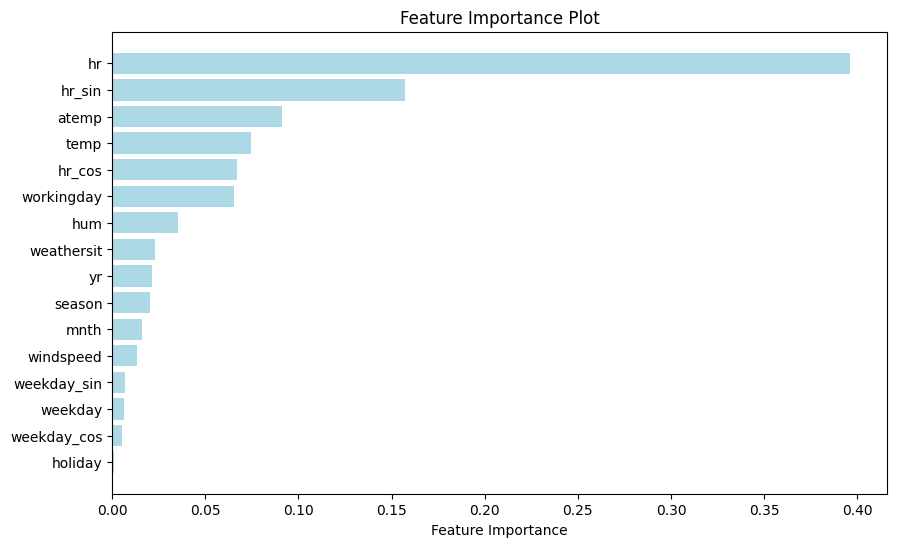

In [88]:
importances = rf_model.feature_importances_

features = X_train.columns
indices = importances.argsort()

plt.figure(figsize=(10, 6))
plt.barh(features[indices], importances[indices], color='lightblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance Plot')
plt.show()


## Material

● What it does:
- Ensemble of decision trees to improve accuracy and reduce overfitting, i.e., combine weak learners.

● How it works:
- Builds multiple decision trees during training and combines their outputs (by averaging for regression or majority voting for classification) to improve accuracy, reduce overfitting, and handle large datasets.
- Bootstrap sampling (bagging): create multiple subsets of the training data (with replacement).
- Feature Randomness: at each split in a tree, the algorithm considers a random subset of features rather than all features. This reduces the correlation between trees and improves generalization.
- Out-of-Bag (OOB) Error: Uses data points not included in a tree’s bootstrap sample to internally
evaluate the model's performance without requiring a separate validation dataset.

● Preconditions for its applicability:
- Requires tuning hyperparameters, e.g., number of trees, bagging, etc.
● Performance Evaluation:
- Accuracy, MSE.
● Pros/cons:
- Robust, reduce overfitting, computationally expensive. 13

# Task 6: Gradient Boosting Regressor – Model Specification and Training
Lecture Material: Lecture 12 (slides 4–7), Class 10 Training Notebook
- Train a Gradient Boosting Regressor (e.g., XGBoost or LightGBM).
- Use basic parameters to establish initial results.
- Plot at least residuals and compare performance with previous models.
- Note any early signs of overfitting or high variance.

In [ ]:
X_train = train_df.drop('cnt', axis=1) 
y_train = train_df['cnt']  
X_test = test_df.drop('cnt', axis=1) 
y_test = test_df['cnt']  
X_valid = test_df.drop('cnt', axis=1) 
y_valid = test_df['cnt']  

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)

xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_val)


## Material 

● What it does:
- Ensemble learning algorithms that build models by combining multiple weak learners (typically
decision trees) to create a strong predictive model (remember random forests).

● How it works:
- Minimize a loss function (e.g. MSE, log loss) using gradient descent and iteratively improve the model.
- Initialization: simple model to predict mean value (regression) or uniform probabilities (classification).
-  Compute residuals: difference between observed values and model predictions (residuals).
- Fit a weak learner (e.g., decision tree): train it to predict the residuals from the previous step.
- Update the model: Add the predictions from the weak learner to the model, scaled by a learning
rate.
- Iterate: until matching a stopping criterion (e.g., # iterations, no improvement in performance).

● Preconditions for its applicability:
- Hyperparameter tuning (learning rate), regularization (prevent overfitting).

● Performance Evaluation:
- Classification: Accuracy, precision, recall, F1-score, AUC-ROC; regression: MSE, MAE , R^2.

● Pros/cons:
- High predictive accuracy, handles non-linear relationships; computationally expensive, sensitive to 17

# Task 7: Hyperparameter Tuning
Lecture Material: Lecture 12 (slides 6–9), Class 10 Training Notebook
- Tune the Random Forest Regressor:
    - Use Randomized Search CV with 5-fold cross-validation.
    - Tune the following hyperparameters: n_estimators, max_depth, min_samples_split, min_samples_leaf
    - Report: Best parameter combination, Validation performance, Updated feature importance

- Tune the Gradient Boosting Regressor:
    - Use Bayesian Optimization (e.g., via BayesSearchCV).
    - Tune the following hyperparameters: learning_rate, n_estimators, max_depth, subsample
    - Visualize convergence of the optimizer if possible.
    - Report: Best parameters, Cross-validated performance, Impact of tuning on generalization

- Explain whether tuning significantly improved performance or not, and hypothesize why (e.g., model variance, overfitting, flat loss surface, etc.).

Note: Compare pre- and post-tuning performance. Highlight overfitting, underfitting, or convergence issues. This task is part of a broader iterative loop — feel free to return to earlier tasks if the results are suboptimal.

# Task 8: Iterative Evaluation and Refinement
Lecture Material: Lecture 9 (slides 6–7), Lecture 11 (slides 3–4), Lecture 12 (slide 9)
- Based on model results, revisit EDA and feature engineering if needed. For example:
    - Do new interaction terms help?
    - Should you drop or transform certain features?
    - Are there outliers that are harming performance?

- Model tuning and evaluation (Tasks 4–8) are iterative. Based on performance, you may revisit:
    - Task 3 (Feature Engineering)
    - Add new transformations
    - Adjust model complexity
    - Document all iterations and reasoning thoroughly in the notebook.

Retrain, re-evaluate, and re-tune your models as needed.